In [1]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ВАХ

In [ ]:
f = open("/content/VAC.txt", "r")
data = f.read()
data = " ".join(data.split())
data = data.split(" ")

In [ ]:
I = []
U_1 = []
k = 0
for d in data:
    if k % 2 == 0:
        U_1.append(float(d))
    else:
        I.append(float(d))
    k += 1

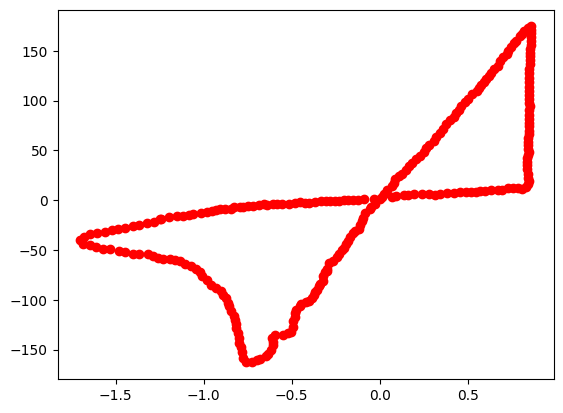

In [ ]:
plt.plot(U_1,I,'ro')

#U-t

In [ ]:
f = open("/content/HfO2v.txt", "r")
data = f.read()
data = " ".join(data.split())
data = data.split(" ")

In [ ]:
U_2 = []
t = []
i = 0
for d in data:
    if i % 2 == 0:
        t.append(float(d))
    else:
        U_2.append(float(d))
    i += 1

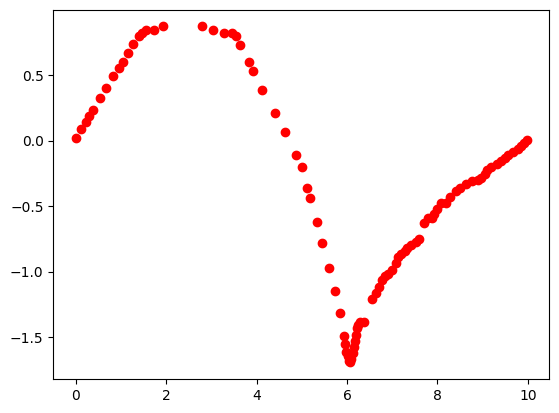

In [ ]:
plt.plot(t,U_2,'ro')

In [ ]:
#info
print(len(U_1), len(I), '\n', U_1[:5], I[:5], '\n', len(U_2), len(t), '\n', U_2[:5], t[:5])

264 264 
 [0.857719, 0.860747, 0.857719, 0.857719, 0.857719] [174.376, 170.884, 167.78, 163.513, 160.021] 
 93 93 
 [0.0196850393700787, 0.090551181102362, 0.137795275590551, 0.18503937007874, 0.232283464566929] [0.0, 0.1194743130227, 0.21505376344086, 0.29868578255675, 0.38231780167264]


In [ ]:
# функция сравнения по напряжению двух таблиц (равны -- тру, не равны -- фолз)
union = []
for i in range(len(U_2)):
    for j in range(len(U_1)):
        if round(U_2[i], 2) == round(U_1[j], 2):
            print(U_2[i], U_1[j])
            union.append([U_2[i], I[j], t[i]])
            break

0.090551181102362 0.0948537
0.137795275590551 0.140262
0.18503937007874 0.194753
0.232283464566929 0.228052
0.397637795275591 0.397578
0.492125984251969 0.488396
0.551181102362205 0.545913
0.598425196850394 0.600404
0.669291338582677 0.67003
0.799212598425197 0.797175
0.822834645669291 0.821393
0.846456692913386 0.854692
0.846456692913386 0.854692
0.846456692913386 0.854692
0.822834645669291 0.821393
0.822834645669291 0.821393
0.799212598425197 0.797175
0.728346456692913 0.727548
0.598425196850394 0.600404
0.0669291338582676 0.0676085
-0.110236220472441 -0.114026
-0.204724409448819 -0.204844
-0.358267716535433 -0.356206
-0.618110236220472 -0.616549
-0.783464566929134 -0.783047
-1.1496062992126 -1.15237
-1.31496062992126 -1.31282
-1.49212598425197 -1.4884
-1.61023622047244 -1.60646
-1.68110236220472 -1.67911
-1.69291338582677 -1.68517
-1.5748031496063 -1.57316
-1.52755905511811 -1.53078
-1.48031496062992 -1.47931
-1.16141732283465 -1.16145
-1.06692913385827 -1.07064
-1.01968503937008 -1

In [ ]:
M = np.matrix(union)

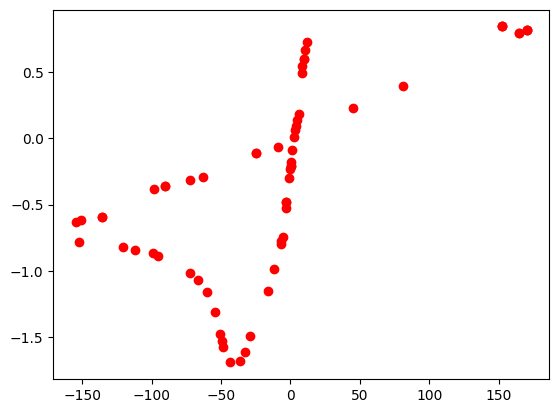

In [ ]:
U = M[:, 0]
I = M[:, 1]
t = M[:, 2]
plt.plot(I,U,'ro')

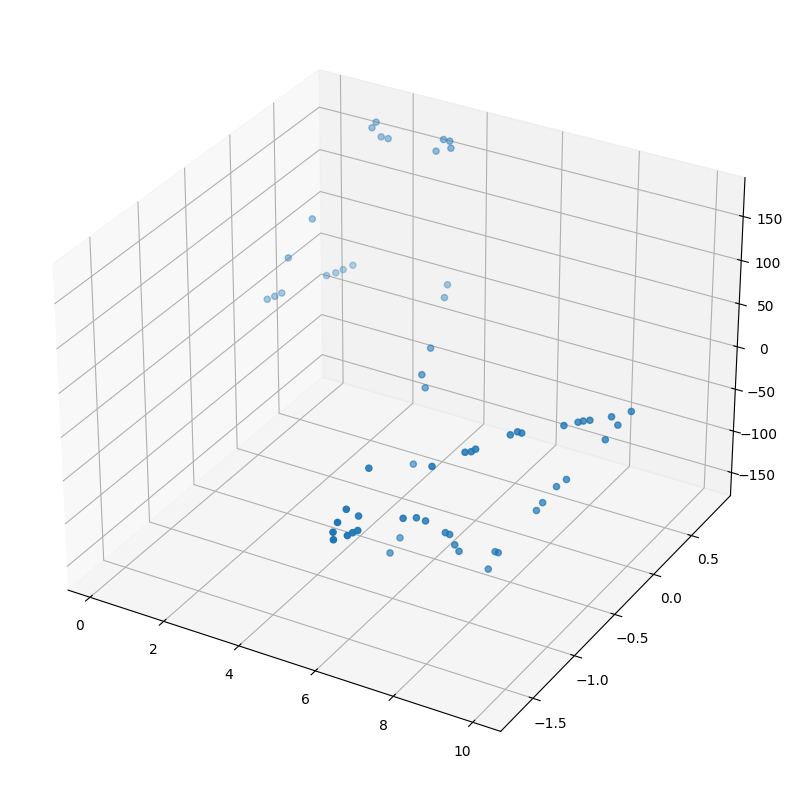

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.add_subplot(111, projection='3d')
U = M[:, 0]
I = M[:, 1]
t = M[:, 2]
ax.scatter(t, U, I)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.asarray(M[:, [1, 2]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.asarray(M[:, 0])
model = LinearRegression().fit(X, y)


In [ ]:
#with norm
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
print(scaler.mean_, scaler.scale_)

X_scaled = scaler.transform(X)
y = np.asarray(M[:, 0])

model_norm = LinearRegression().fit(X_scaled, y)

[-11.57822043   5.61187916] [82.58081621  2.92418085]


In [ ]:
import random
random.uniform(0, 0.5)

0.02996375910861593

In [ ]:
mean_squared_error(y, model.predict(X))

0.2632171886844845

In [ ]:
mean_squared_error(y, model_norm.predict(X_scaled))

0.2632171886844845

Evaluate

0.454609099836546

In [ ]:
X[0][0] + np.random.rand(1)[0]

4.014471155933726

In [ ]:
X_test = []
for x in X:
  X_test.append([x[0] + random.uniform(0, 0.01), x[1]])

In [ ]:
X_test_M = np.matrix(X_test)

In [ ]:
X_test_M

matrix([[ 3.95793185e+00,  1.19474313e-01],
        [ 4.74108526e+00,  2.15053763e-01],
        [ 5.91265483e+00,  2.98685783e-01],
        [ 4.47193793e+01,  3.82317802e-01],
        [ 8.08164667e+01,  6.69056153e-01],
        [ 8.28493817e+00,  8.24372760e-01],
        [ 8.28877984e+00,  9.43847073e-01],
        [ 9.46028337e+00,  1.03942652e+00],
        [ 1.02427686e+01,  1.14695341e+00],
        [ 1.64675015e+02,  1.39784946e+00],
        [ 1.70104978e+02,  1.45758662e+00],
        [ 1.52270552e+02,  1.54121864e+00],
        [ 1.52261978e+02,  1.73237754e+00],
        [ 1.52270968e+02,  3.03464755e+00],
        [ 1.70106743e+02,  3.28554361e+00],
        [ 1.70109475e+02,  3.45280765e+00],
        [ 1.64678591e+02,  3.53643967e+00],
        [ 1.18009959e+01,  3.62007168e+00],
        [ 9.45992183e+00,  3.82317802e+00],
        [ 3.57459123e+00,  4.62365591e+00],
        [-2.47784014e+01,  4.87455197e+00],
        [ 3.87475170e-02,  4.99402628e+00],
        [-8.99858900e+01,  5.113

In [ ]:
mean_squared_error(y, model.predict(X_test))

0.263213588624934

Восстановленное ЛП

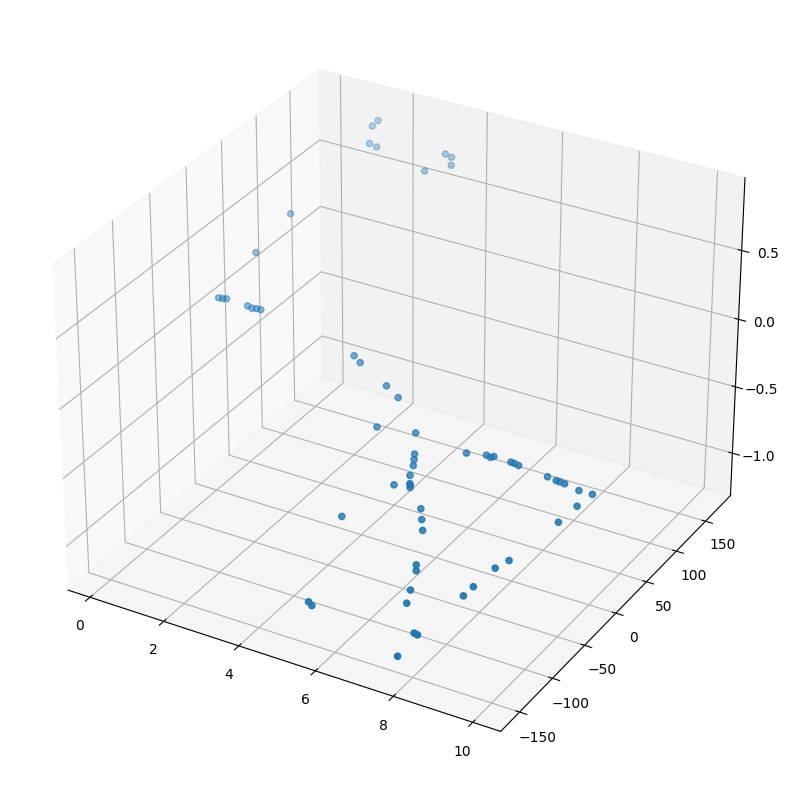

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_M[:, 1], X_test_M[:, 0], model.predict(X_test))

Восстановленный ВАХ с шумом

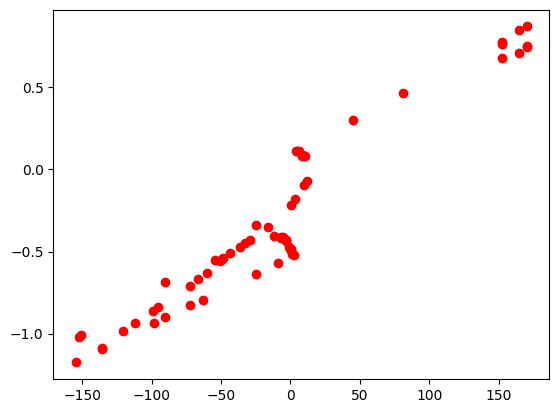

In [ ]:
plt.plot(X_test_M[:, 0],  model.predict(X_test),'ro')

In [ ]:
X_test_real = []
for x in X:
  X_test_real.append([x[0], x[1]])

Восстановленный ВАХ без шума

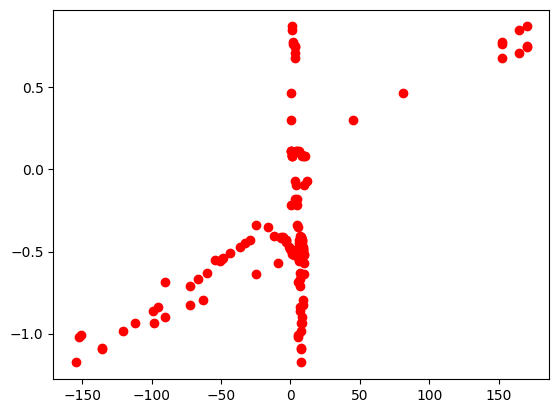

In [ ]:
plt.plot(X, model.predict(X),'ro')